In [1]:
cd '/Users/alclark/Documents/GitHub/Matplotlib-for-Storytellers/figures/mathplots' 

/Users/alclark/Documents/GitHub/Matplotlib-for-Storytellers/figures/mathplots


In [2]:
import nbformat

In [3]:
def savepy(filename, source: str = None, cell_no: int = None):
    '''
    Save python file from string. Assumes the working directory is the root project folder.
    '''
    filename = filename + '.py'
    path = '../../python/'

    current_cell = get_ipython().execution_count
    
    if source is None:
        if cell_no is None:
            cell_no = current_cell - 2 # - 1 for 0-based -1 again for previous
            #raise Exception("need source or cell number.")
        # get cell source
        tmp = nbformat.read(path + 'Math-Interlude-Figure-Dev.ipynb', as_version=4)
        cell = tmp.cells[cell_no]
        source = cell['source']
        
        # truncate source
        trunc_word = '#truncate'
        if trunc_word in source:
            source = source[:source.index(trunc_word)]
            
        # strip white space
        lines = source.splitlines()
        for i in range(len(lines)):
            lines[i] = lines[i].rstrip()
        source = '\n'.join(lines)
        
    with open(path + filename, 'w') as f:
        f.write(source)

In [4]:
%run -i ../../python/imports.py

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


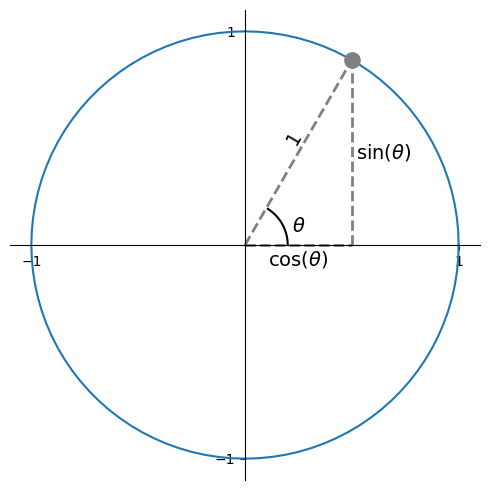

In [5]:
angles = np.linspace(0, 2*np.pi, 101)
x = np.cos(angles)
y = np.sin(angles)

fig, ax = plt.figure(figsize = (5,5)), plt.axes()
ax.set_aspect('equal')

# Make circle
ax.plot(x,y)
    
# Plot example right triangle 
angle = np.pi/3

# make hypotenuse
ax.plot([0,np.cos(angle)], [0,np.sin(angle)], 
        linestyle = 'dashed', color ='gray', linewidth = 2)#

# mark point on circle
ax.plot([np.cos(angle)], [np.sin(angle)], 
        marker = 'o', color ='gray', markersize = 11) 

# dashed lines for opposite and adjacent
ax.plot([0,np.cos(angle)], [0,0], 
        linestyle = 'dashed', color ='gray', linewidth = 2)
ax.plot([np.cos(angle),np.cos(angle)], [0,np.sin(angle)], 
        linestyle = 'dashed', color ='gray', linewidth = 2)

# Triangle side lengths
fontsize = 14
ax.text(0.5*np.cos(angle) - .02, 0.5*np.sin(angle)+.02, 
        '1', rotation = math.degrees(angle), ha = 'center', va = 'bottom', size = fontsize)
ax.text(0.5*np.cos(angle), -.02, r"$\cos(\theta)$", 
        rotation = 0, ha = 'center', va = 'top', size = fontsize)
ax.text(np.cos(angle) + .02, 0.5*np.sin(angle), r"$\sin(\theta)$", 
        rotation = 0, ha = 'left', va = 'center', size = fontsize)

    
# make small arc and mark angle
x = np.cos(angles[angles<= angle])
y = np.sin(angles[angles<= angle])
ax.plot(0.2*x,0.2*y, color = 'black')
ax.text(0.2*np.cos(np.pi/10), 0.2*np.sin(np.pi/10),
        r" $\theta$", size = 14)

# clean appearance   
%run ../../python/spine-mod.py
ax.set_xticks([-1, 1])
ax.set_yticks([-1, 1])
#truncate
plt.tight_layout()
plt.savefig("unit-circle.pdf")

In [6]:
savepy('unit-circle')

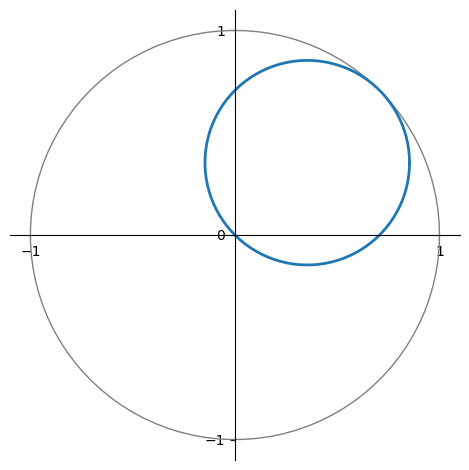

In [7]:
angles = np.linspace(0, 2*np.pi, 100)

fig, ax = plt.figure(), plt.axes()
ax.set_aspect('equal')

# Unit Circle
x = np.cos(angles)
y = np.sin(angles)
ax.plot(x, y, color = 'gray', linewidth = 1)

# Shifted
new_radius = 0.5
new_center = np.cos(np.pi/4)/2, np.sin(np.pi/4)/2
shift_x = new_radius*x + new_center[0]
shift_y = new_radius*y + new_center[1]
ax.plot(shift_x, shift_y, linewidth = 2)

%run ../../python/spine-mod.py

ax.set_xticks([-1, 1])
ax.set_yticks([-1, 0, 1])
#truncate
plt.tight_layout()
plt.savefig("unit-circle-shift.pdf")

In [8]:
savepy('unit-circle-shift')

In [9]:
theta = np.pi / 4
rotation_matrix = np.matrix([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

x_scale = 0.5
x_stretch = np.matrix([[x_scale, 0], [0, 1]])

y_scale = 2
y_stretch = np.matrix([[1, 0], [0, y_scale]])

transformation = rotation_matrix * y_stretch * x_stretch

In [10]:
savepy('tform-matrix')

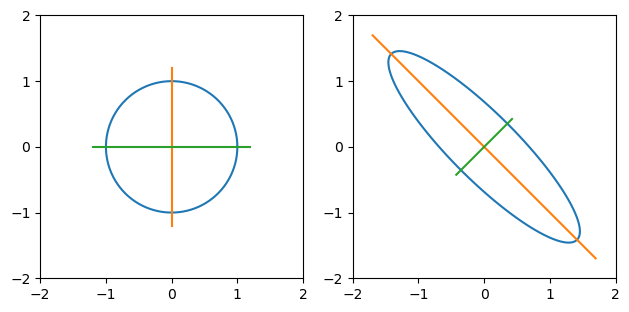

In [11]:
# Create a circle of points
angles = np.linspace(0, 2*np.pi, 100)
x_vals = np.cos(angles)
y_vals = np.sin(angles)

# Begin plot
fig, ax = plt.subplots(1,2)

# simplify axes names
ax0, ax1 = ax[0], ax[1]

# Plot a circle
ax0.plot(x_vals, y_vals)

# Mark the y and x directions/axes
# vertical axis
height = 1.2
p1 = np.array([0,-height])
p2 = np.array([0,height])
points = [p1,p2]
x_vertical = [p[0] for p in points]
y_vertical = [p[1] for p in points]
ax0.plot(x_vertical, y_vertical)

# horizontal axis
width = height
p1 = np.array([height,0])
p2 = np.array([-height,0])
points = [p1,p2]
x_horiz = [p[0] for p in points]
y_horiz = [p[1] for p in points]
ax0.plot(x_horiz, y_horiz)

# Make Ellipse
new_points = [transformation * np.matrix(p).T for p in zip(x_vals,y_vals)]

new_x = [np.array(x).flatten()[0] for x in new_points]
new_y = [np.array(x).flatten()[1] for x in new_points]

# new vertical axis
new_vertical = [transformation * np.matrix(p).T for p in zip(x_vertical, y_vertical)]
new_x_vertical = [np.array(x).flatten()[0] for x in new_vertical]
new_y_vertical = [np.array(x).flatten()[1] for x in new_vertical]

# new horizontal axis
new_horiz = [transformation * np.matrix(p).T for p in zip(x_horiz, y_horiz)]
new_x_horiz = [np.array(x).flatten()[0] for x in new_horiz]
new_y_horiz = [np.array(x).flatten()[1] for x in new_horiz]

# Plot ellipse etc
ax1.plot(new_x, new_y)
ax1.plot(new_x_vertical, new_y_vertical)
ax1.plot(new_x_horiz, new_y_horiz)

# Change axes appearance
args = -2,2
for ax_ in ax0, ax1:
    ax_.set_xlim(args)
    ax_.set_ylim(args)
    ax_.set_xticks(np.linspace(*args,5))
    ax_.set_yticks(np.linspace(*args,5))
ax0.set_aspect('equal')
ax1.set_aspect('equal')
#truncate
plt.tight_layout()
plt.savefig("ellipse-tform.pdf")

In [12]:
savepy('ellipse-tform')

In [13]:
## Right triangles

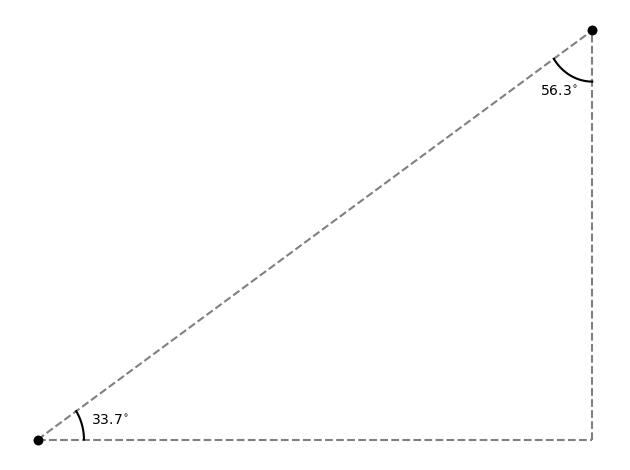

In [14]:
fig, ax = plt.figure(), plt.axes()

a = (1,2)
b = (7,6)

# rise over run
slope = (a[1] - b[1]) / (a[0] - b[0])
angle = math.atan(slope) # radians
degrees = math.degrees(angle)

top_angle = math

## add angle semi-circle
x = np.linspace(0, angle, 100)
ax.plot(0.5 * np.cos(x) + a[0],
         0.5 * np.sin(x) + a[1],
         color = 'black')
ax.text(0.5*np.cos(angle/2) + 1.1, 0.5*np.sin(angle/2) + 2,
        s = r"${:.1f}".format(degrees) + r"^{\circ}$")

# top slope measured relative to a 90-deg rotation
top_slope = (b[0]-a[0])/(b[1]-a[1])
top_angle = math.atan(top_slope)
x = np.linspace(1.5*np.pi, 1.5*np.pi - top_angle, 100)
ax.plot(0.5*np.cos(x) + b[0],
         0.5*np.sin(x) + b[1],
         color = 'black')
label_angle = 1.5*np.pi - top_angle/2
ax.text(0.5*np.cos(label_angle) + b[0] - 0.13, 0.5*np.sin(label_angle) + b[1] - 0.2,
        s = r"${:.1f}".format(math.degrees(top_angle)) + r"^{\circ}$",
       ha = 'center')


# points on left and top
ax.plot([a[0], b[0]], [a[1], b[1]], linestyle = '', marker = 'o', color = 'black')

# make a right triangle
ax.plot([a[0], b[0]], [a[1], b[1]], linestyle = 'dashed', marker = 'o', color = 'gray', zorder = -1)
ax.plot([a[0], b[0]], [a[1], a[1]], linestyle = 'dashed', color = 'gray', zorder = -1)
ax.plot([b[0], b[0]], [a[1], b[1]], linestyle = 'dashed', color = 'gray', zorder = -1)
ax.axis('off')
#truncate
plt.tight_layout()
plt.savefig("r-triangle.pdf")

In [15]:
savepy('r-triangle')

In [16]:
## sloping text

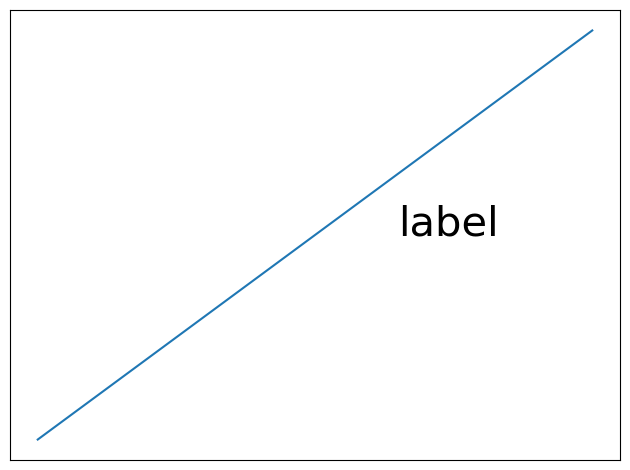

In [17]:
plt.plot([0,1], [0,1])
plt.text(0.65, 0.5,
         s = 'label',
         size = 30) 

ax = plt.gca()
# Cosmetics
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
#truncate
plt.tight_layout()
plt.savefig("no-slope.pdf")

In [18]:
savepy('no-slope')

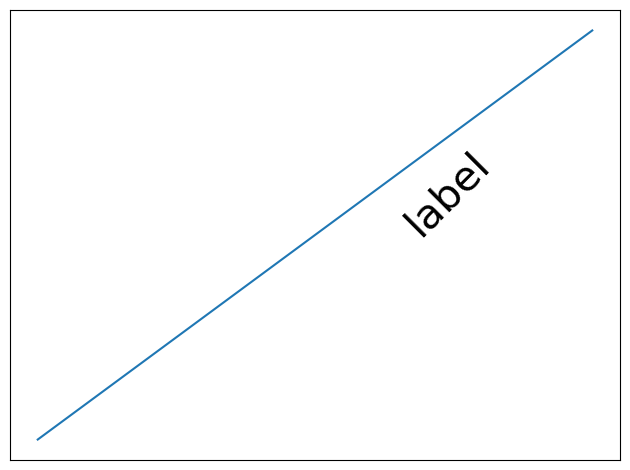

In [19]:
plt.plot([0,1], [0,1])
plt.text(0.65, 0.5,
         s = 'label',
         rotation = 45,
         size = 30) 
# Cosmetics
ax = plt.gca()
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
#truncate
plt.tight_layout()
plt.savefig("bad-slope.pdf")

45.0 36.692053065916376


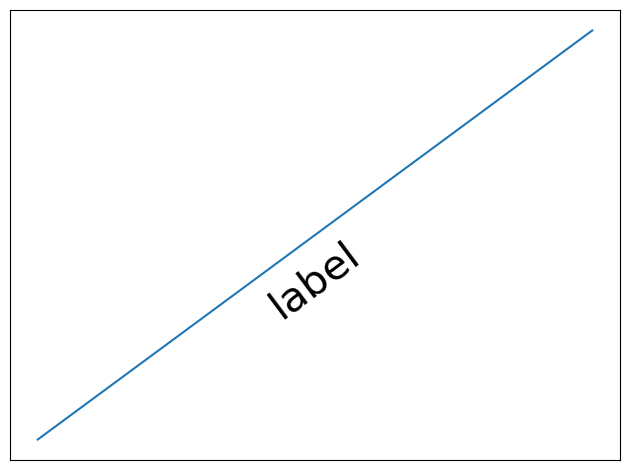

In [20]:
x1, y1 = 0, 0
x2, y2 = 1, 1
x = (x1, x2)
y = (y1, y2)

# plot
fig, ax = plt.figure(), plt.axes()
ax.plot(x,y)

# Find angles and then insert text
slope = (y2 - y1) / (x2 - x1)
true_angle = math.degrees(math.atan(slope))

# dummy_array is the point where the angles are anchored
dummy_array = np.array([[0,0]]) # doesn't matter what pair you use
# matplotlib.org/stable/api/transformations.html#matplotlib.transforms.Transform.transform_angles

plot_angle = ax.transData.transform_angles(
                            np.array((true_angle,)),
                            dummy_array)[0]

ax.text(np.mean(x), np.mean(y),
        s = 'label',
        rotation = plot_angle,
        fontsize = 30,
        va = 'top',
        ha = 'center')

ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
print(true_angle, plot_angle)
#truncate
plt.tight_layout()
plt.savefig("slope-label.pdf")

In [21]:
savepy('slope-label')

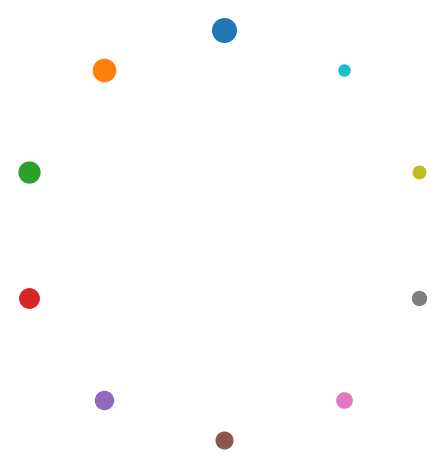

In [22]:
n_points = 10
pie_angle = 360/n_points # angle of each slice
starting_angle = 90

fig, ax = plt.subplots()

for i in range(n_points):
    
    angle = starting_angle + i*pie_angle
    angle = math.radians(angle)
    x = math.cos(angle) 
    y = math.sin(angle)
        
    ax.plot([x],[y], 'o', markersize = 17 - i)
    
ax.set_aspect('equal')
ax.axis('off')
#truncate
plt.tight_layout()
plt.savefig("circle.pdf")

In [23]:
savepy('circle')

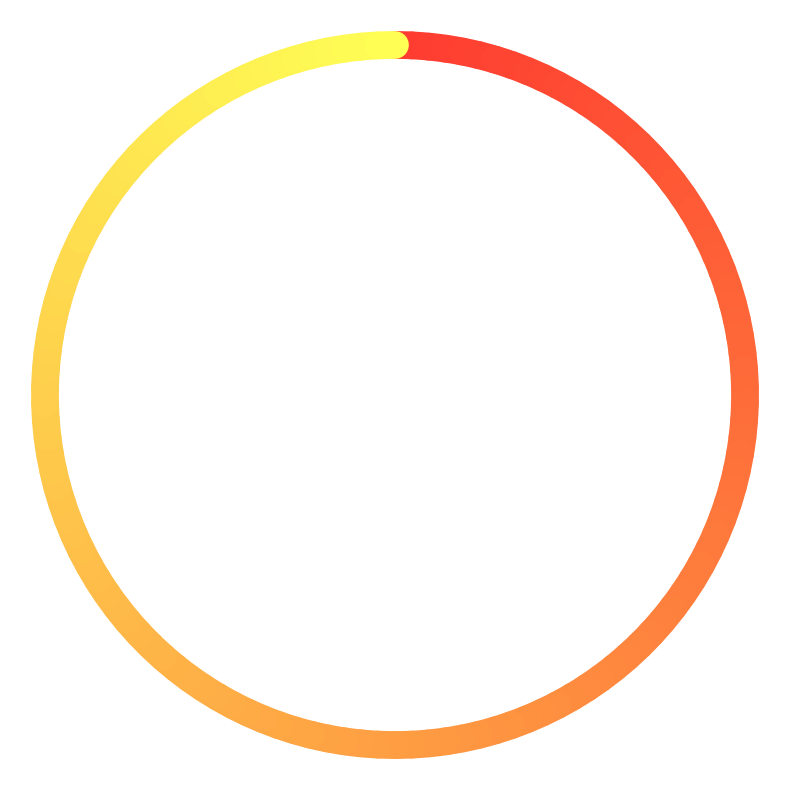

In [24]:
# make a circle gradient
start_color = 255/256, 59/256, 48/256 # red
end_color = 255/256, 255/256, 85/256 # yellow

# How many color changes
segments = 130

# Create figure
fig, ax = plt.figure(figsize = (8,8)), plt.axes()

# Start at 90 degrees and return clockwise
angles = np.linspace(2.5*np.pi, np.pi/2, segments + 1)

# Create the intermediate colors
colors = dict()
for i in range(3):
    colors[i] = np.linspace(start_color[i], end_color[i], segments)
    
# plot each arc
for i in range(segments):
    
    start_angle = angles[i]
    end_angle = angles[i+1]
    angle_slice = np.linspace(start_angle, end_angle, 100)
    
    x_values = np.cos(angle_slice)
    y_values = np.sin(angle_slice)
    
    rgb = colors[0][i], colors[1][i], colors[2][i]
    
    ax.plot(x_values, y_values, 
            color = rgb,
            linewidth = 20, 
            solid_capstyle = 'round')

ax.set_aspect('equal')
ax.axis('off')
#truncate
plt.tight_layout()
plt.savefig('circle-grad.pdf')

In [25]:
savepy('circle-grad')

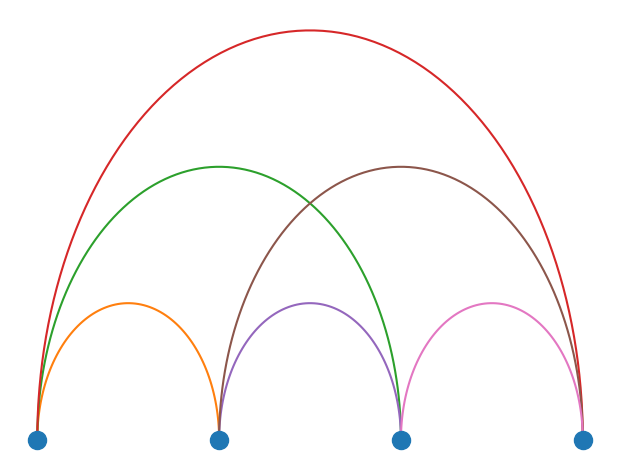

In [26]:
fig, ax = plt.figure(), plt.axes()
x = np.linspace(0,1,4)
ax.plot(x, np.zeros(4), 
        marker = 'o', 
        linestyle = '',
        markersize = 13)

angles = np.linspace(0,np.pi,100)
for point in x:
    # connect other points
    other_x = x[x > point]
    # construct a half circle
    unit_x, unit_y = np.cos(angles), np.sin(angles)
    for other in other_x:
        # arc is centered between the two points
        shift = np.mean([point,other])
        r = (other - point)/2
        new_x = r*unit_x + shift
        new_y = r*unit_y
        ax.plot(new_x, new_y, zorder = -1)
    
ax.axis('off')
ax.set_aspect(1.5)
#truncate
plt.tight_layout()
plt.savefig("arc-graph.pdf")

In [27]:
savepy('arc-graph')

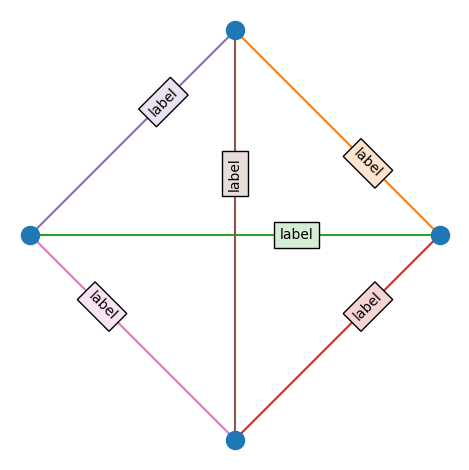

In [28]:
fig, ax = plt.figure(), plt.axes()

n_points = 4

# Draw vertices
angles = np.linspace(0, 2*np.pi, n_points + 1)[0:n_points]
x = np.cos(angles)
y = np.sin(angles)
ax.plot(x, y, 
        marker = 'o', 
        linestyle = '',
        markersize = 13)

# Draw Edges
points = [p for p in zip(x,y)]
counter = 1
for point, other in combinations(points,2):

    x = [p[0] for p in (point, other)]
    y = [p[1] for p in (point, other)]
    ax.plot(x, y, zorder = -1)

    # add a label
    label_point = .65*np.array(point) + .35*np.array(other)

    run = x[1]-x[0]
    rotation = 90
    ha = 'left'
    if run != 0:
        line_slope = (y[1]-y[0])/(x[1]-x[0])
        rotation = math.atan(line_slope)
        rotation = math.degrees(rotation)
        ha = 'center'
    else:
        print(point, other, rotation)

    # get rgb then blend with white
    line_color = mpl.colors.to_rgb("C"+str(counter))
    lighter = .8*np.ones(3) + .2*np.array(line_color)
    ax.text(label_point[0], label_point[1],
            'label', rotation = rotation,
            bbox = dict(facecolor = lighter),
            va = 'center',
            ha = 'center'
           )
    counter += 1
        
ax.axis('off')
ax.set_aspect('equal')
#truncate
plt.tight_layout()
plt.savefig('circle-graph.pdf')

In [29]:
savepy('circle-graph')

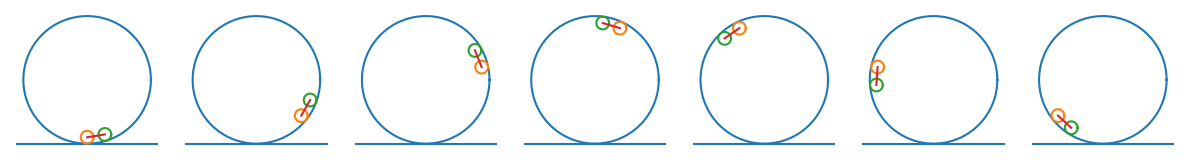

In [30]:
thetas = np.linspace(0,2*np.pi,8)[0:-1]
fig = plt.figure(figsize = (12,3))

# Set radius for skateboard wheels
radius = 0.1

# Make individual subplots
for key, theta in enumerate(thetas): 
    rotation_matrix = np.matrix([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

    # Create panel for one frame
    ax = fig.add_subplot(1, len(thetas), key+1)
    ax.set_aspect('equal')

    # Plot the loop itself
    angles = np.linspace(0, 2*np.pi, 100)
    x = np.cos(angles)
    y = np.sin(angles)
    ax.plot(x,y)

    # Make skateboard wheels at bottom of the ramp
    # and then rotate them counter-clockwise according to theta
    centers = list()
    for ang in 1.5*np.pi, 1.6*np.pi:      
        center = (1-radius)*np.cos(ang), (1-radius)*np.sin(ang)

        # rotate 
        point = np.matrix(center).T
        rotated_point = rotation_matrix*point
        rotated_point = np.array(rotated_point).flatten()
        centers.append(rotated_point)
        
        # make wheel around new center
        wheel_x = radius*x + rotated_point[0]
        wheel_y = radius*y + rotated_point[1]

        ax.plot(wheel_x, wheel_y)

    # connect the two wheel centers
    c1, c2 = centers
    ax.plot([c1[0],c2[0]], [c1[1],c2[1]])
    
    ax.axis('off')
    
    xlim = ax.get_xlim()
    ax.plot(xlim, [-1,-1],
            color = 'C0',
            zorder = -1)
#truncate
plt.tight_layout()
plt.savefig('tony-hawk.pdf')

In [31]:
savepy('tony-hawk')